# Visualize Principle Component Analysis
- apply it to a toy example

In [1]:
%matplotlib widget

In [2]:
import numpy as np
import sklearn
import scipy
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation as R

## Generate synthetic dataset
- three-dimensional gaussian
- center not at zero and non-trivial covariance matrix (reshaping + rotation)

In [3]:
mu = np.array([4, 5, 2])

#eigenvalues
shape = np.array([100, 10, 1])
print(f"eigenvalues:\n{shape.tolist()}")

#eigenvectors (from rotation of 45° around [1, 0, 1])
direction = R.from_rotvec(np.pi/4 * np.array([1, 0, 1]) / np.sqrt(2)).as_matrix()
print(f"\neigenvectors:\n{direction[0]}\n{direction[1]}\n{direction[2]}")

sigma_sqrt = np.diag(np.sqrt(shape)) @ direction.T

eigenvalues:
[100, 10, 1]

eigenvectors:
[ 0.85355339 -0.5         0.14644661]
[ 0.5         0.70710678 -0.5       ]
[0.14644661 0.5        0.85355339]


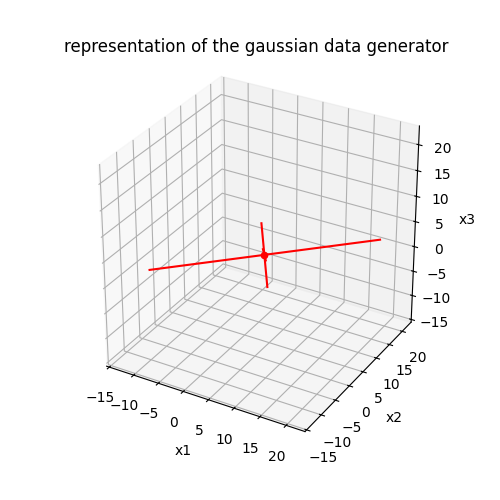

In [4]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(projection='3d')
ax.set_box_aspect([1, 1, 1])

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')

ax.set_title('representation of the gaussian data generator')

ax.scatter(mu[0], mu[1], mu[2], color='red')

for i in range(3):
    sigma = 2*np.sqrt(shape[i])
    ax.plot(
        [mu[0] - sigma*direction[0, i], mu[0] + sigma*direction[0, i]], 
        [mu[1] - sigma*direction[1, i], mu[1] + sigma*direction[1, i]], 
        [mu[2] - sigma*direction[2, i], mu[2] + sigma*direction[2, i]], 
        color='red'
    )

xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()
zmin, zmax = ax.get_zlim()

fmin = min(xmin, ymin, zmin)
fmax = max(xmax, ymax, zmax)

ax.set_xlim(fmin, fmax)
ax.set_ylim(fmin, fmax)
ax.set_zlim(fmin, fmax)

plt.show()

In [5]:
N = 200
gauss = np.random.randn(N, 3)
X = mu + gauss @ sigma_sqrt

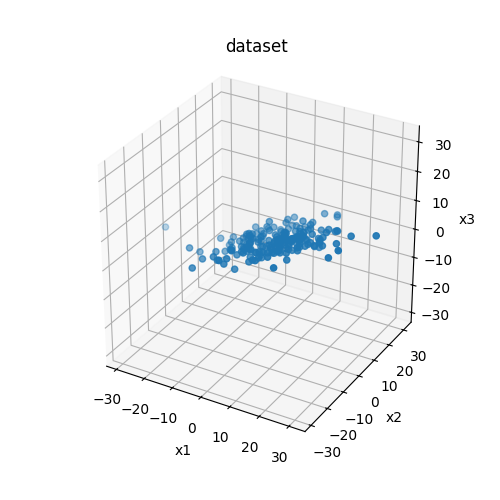

In [6]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(projection='3d')
ax.set_box_aspect([1, 1, 1])

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')

ax.set_title('dataset')

ax.scatter(X[:, 0], X[:, 1], X[:, 2])

xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()
zmin, zmax = ax.get_zlim()

fmin = min(xmin, ymin, zmin)
fmax = max(xmax, ymax, zmax)

ax.set_xlim(fmin, fmax)
ax.set_ylim(fmin, fmax)
ax.set_zlim(fmin, fmax)

plt.show()

## Compute PCA axes
- center data
- find eigenvalues and eigenvectors of empirical covariance
- eigenvectors are the components
- principality comes through sorting by eigenvalues

In [7]:
mean_data = X.mean(0)
X_centered = X - mean_data
cov_data = np.cov(X_centered.T)

In [8]:
U, s, Vh = scipy.linalg.svd(X_centered.T @ X_centered)

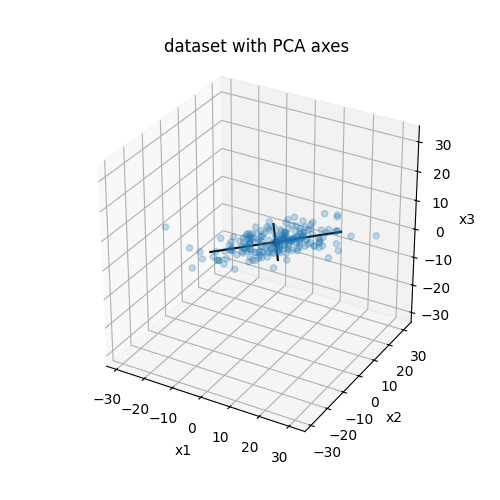

In [9]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(projection='3d')
ax.set_box_aspect([1, 1, 1])

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')

ax.set_title('dataset with PCA axes')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], alpha=0.25)

ax.scatter(mean_data[0], mean_data[1], mean_data[2], color='black')

for i in range(3):
    sigma = 2*np.sqrt(s[i]/N)
    ax.plot(
        [mean_data[0] - sigma * U[0, i], mean_data[0] + sigma * U[0, i]], 
        [mean_data[1] - sigma * U[1, i], mean_data[1] + sigma * U[1, i]], 
        [mean_data[2] - sigma * U[2, i], mean_data[2] + sigma * U[2, i]], 
        color='black'
    )

xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()
zmin, zmax = ax.get_zlim()

fmin = min(xmin, ymin, zmin)
fmax = max(xmax, ymax, zmax)

ax.set_xlim(fmin, fmax)
ax.set_ylim(fmin, fmax)
ax.set_zlim(fmin, fmax)

plt.show()

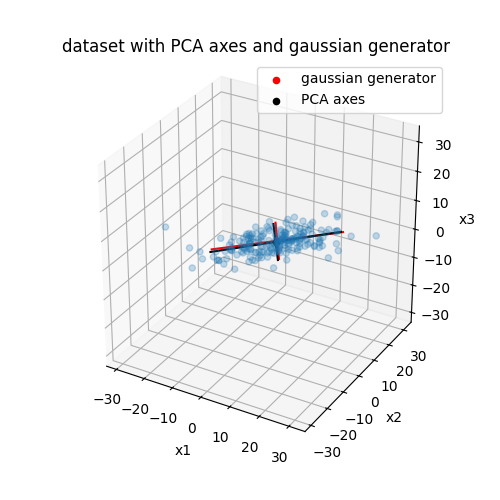

In [10]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(projection='3d')
ax.set_box_aspect([1, 1, 1])

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')

ax.set_title('dataset with PCA axes and gaussian generator')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], alpha=0.25)

ax.scatter(mu[0], mu[1], mu[2], color='red', label='gaussian generator')

for i in range(3):
    sigma = 2*np.sqrt(shape[i])
    ax.plot(
        [mu[0] - sigma*direction[0, i], mu[0] + sigma*direction[0, i]], 
        [mu[1] - sigma*direction[1, i], mu[1] + sigma*direction[1, i]], 
        [mu[2] - sigma*direction[2, i], mu[2] + sigma*direction[2, i]], 
        color='red'
    )

ax.scatter(mean_data[0], mean_data[1], mean_data[2], color='black', label='PCA axes')

for i in range(3):
    sigma = 2*np.sqrt(s[i]/N)
    ax.plot(
        [mean_data[0] - sigma * U[0, i], mean_data[0] + sigma * U[0, i]], 
        [mean_data[1] - sigma * U[1, i], mean_data[1] + sigma * U[1, i]], 
        [mean_data[2] - sigma * U[2, i], mean_data[2] + sigma * U[2, i]], 
        color='black'
    )

xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()
zmin, zmax = ax.get_zlim()

fmin = min(xmin, ymin, zmin)
fmax = max(xmax, ymax, zmax)

ax.set_xlim(fmin, fmax)
ax.set_ylim(fmin, fmax)
ax.set_zlim(fmin, fmax)

ax.legend()

plt.show()

## Apply PCA for dimension reduction
- project centered data on first $d$ principle components

In [11]:
Y = X_centered @ U[:,:2]

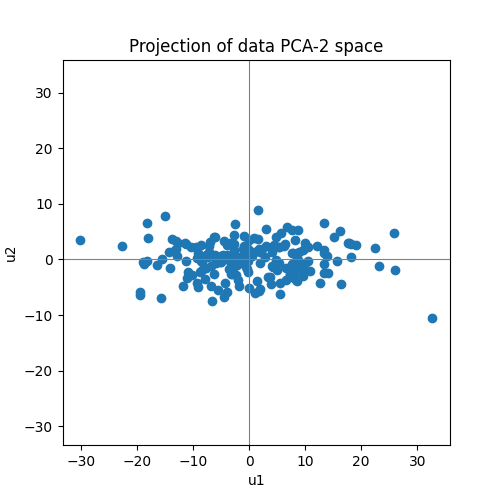

In [12]:
plt.figure(figsize=(5,5))

plt.xlabel('u1')
plt.ylabel('u2')

plt.title('Projection of data PCA-2 space')

plt.axline([0, 0], [1, 0], color='gray', linewidth=0.8)
plt.axline([0, 0], [0, 1], color='gray', linewidth=0.8)

plt.scatter(Y[:, 0], Y[:, 1])

xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()

fmin = min(xmin, ymin)
fmax = max(xmax, ymax)

plt.xlim(fmin, fmax)
plt.ylim(fmin, fmax)

plt.show()

## Explore Logic of PCA
- decorrelate centered data by projection on its principle components
- normalize decorrelated data by dividing principle component axes by their respective eigenvalues (square root of singular values)

In [13]:
X_decorrelated = X_centered @ U

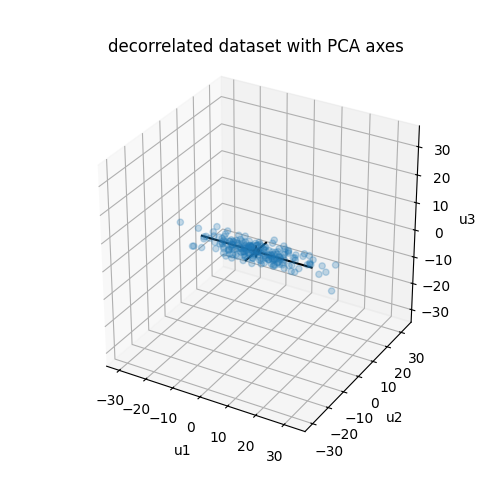

In [14]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(projection='3d')
ax.set_box_aspect([1, 1, 1])

ax.set_title('decorrelated dataset with PCA axes')

ax.set_xlabel('u1')
ax.set_ylabel('u2')
ax.set_zlabel('u3')

ax.scatter(0, 0, 0, color='black')

for i in range(3):
    sigma = 2*np.sqrt(s[i]/N)
    ax.plot(
        [- sigma * (i == 0), sigma * (i == 0)], 
        [- sigma * (i == 1), sigma * (i == 1)], 
        [- sigma * (i == 2), sigma * (i == 2)], 
        color='black'
    )

ax.scatter(X_decorrelated[:, 0], X_decorrelated[:, 1], X_decorrelated[:, 2], alpha=0.25)

xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()
zmin, zmax = ax.get_zlim()

fmin = min(xmin, ymin, zmin)
fmax = max(xmax, ymax, zmax)

ax.set_xlim(fmin, fmax)
ax.set_ylim(fmin, fmax)
ax.set_zlim(fmin, fmax)

plt.show()

In [15]:
X_normalized = X_decorrelated @ np.diag(np.sqrt(N/s))

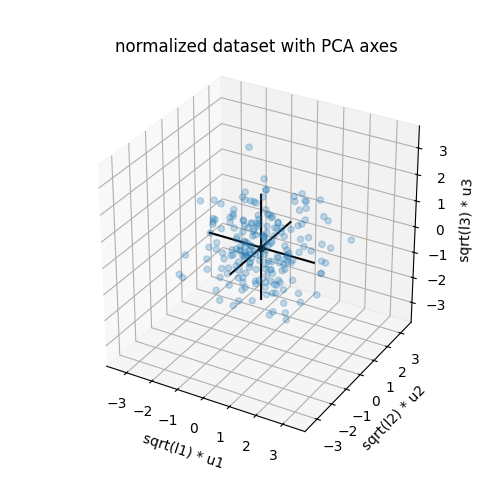

In [16]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(projection='3d')
ax.set_box_aspect([1, 1, 1])

ax.set_title('normalized dataset with PCA axes')

ax.set_xlabel('sqrt(l1) * u1')
ax.set_ylabel('sqrt(l2) * u2')
ax.set_zlabel('sqrt(l3) * u3')

ax.scatter(0, 0, 0, color='black')

for i in range(3):
    ax.plot(
        [- 2 * (i == 0), 2 * (i == 0)], 
        [- 2 * (i == 1), 2 * (i == 1)], 
        [- 2 * (i == 2), 2 * (i == 2)], 
        color='black'
    )

ax.scatter(X_normalized[:, 0], X_normalized[:, 1], X_normalized[:, 2], alpha=0.25)

xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()
zmin, zmax = ax.get_zlim()

fmin = min(xmin, ymin, zmin)
fmax = max(xmax, ymax, zmax)

ax.set_xlim(fmin, fmax)
ax.set_ylim(fmin, fmax)
ax.set_zlim(fmin, fmax)

plt.show()